In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('bright')

In [ ]:
df2020 = pd.read_csv('/content/PenerbanganJKT - 2020.csv')
df2021 = pd.read_csv('/content/PenerbanganJKT - 2021.csv')

df_2020 = pd.DataFrame({'date': ['1/2020', '2/2020', '3/2020', '4/2020', '5/2020', '6/2020', '7/2020', '8/2020', '9/2020', '10/2020', '11/2020', '12/2020']})
df2020['Bulan'] = pd.to_datetime(df_2020['date'])

df_2021 = pd.DataFrame({'date': ['1/2021', '2/2021', '3/2021', '4/2021', '5/2021', '6/2021', '7/2021', '8/2021', '9/2021', '10/2021', '11/2021', '12/2021']})
df2021['Bulan'] = pd.to_datetime(df_2021['date'])

In [ ]:
df2020.drop(['Unnamed: 0'], axis = 1, inplace=True)
df2021.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [ ]:
df_combine = pd.concat([df2020, df2021]).reset_index()
df_combine

,index,Domestik,Internasional,Total,Bulan
0,0,1600594,626097,2226691,2020-01-01
1,1,1551967,444267,1996234,2020-02-01
2,2,1211697,187899,1399596,2020-03-01
3,3,191002,17499,208501,2020-04-01
4,4,27500,9460,36960,2020-05-01
5,5,174352,14619,188971,2020-06-01
6,6,427731,22618,450349,2020-07-01
7,7,574597,28513,603110,2020-08-01
8,8,500591,32043,532634,2020-09-01
9,9,601391,36549,637940,2020-10-01


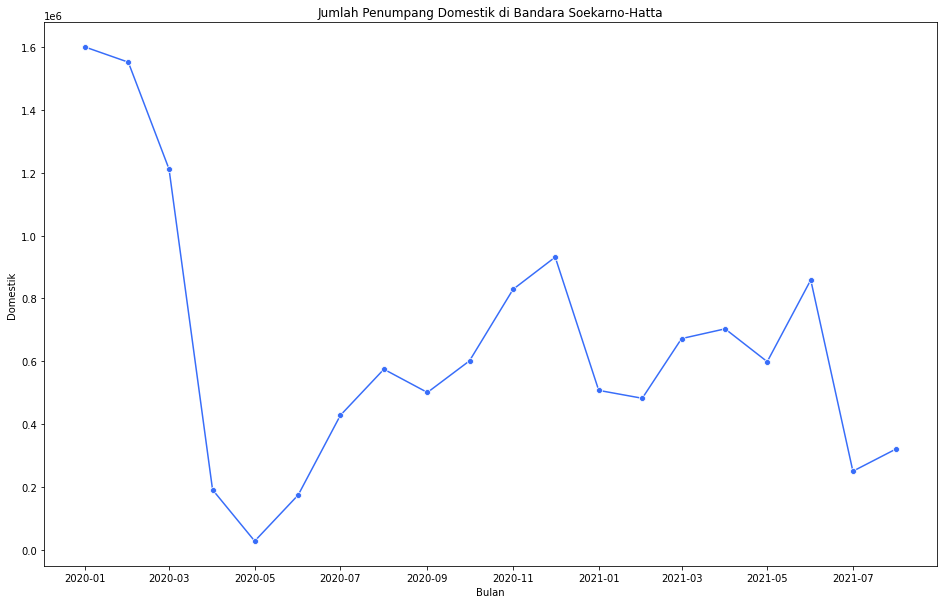

In [ ]:
plt.figure(figsize=(16, 10))
sns.lineplot(data = df_combine, x = 'Bulan', y = 'Domestik', marker = 'o')
plt.title('Jumlah Penumpang Domestik di Bandara Soekarno-Hatta')
plt.show()

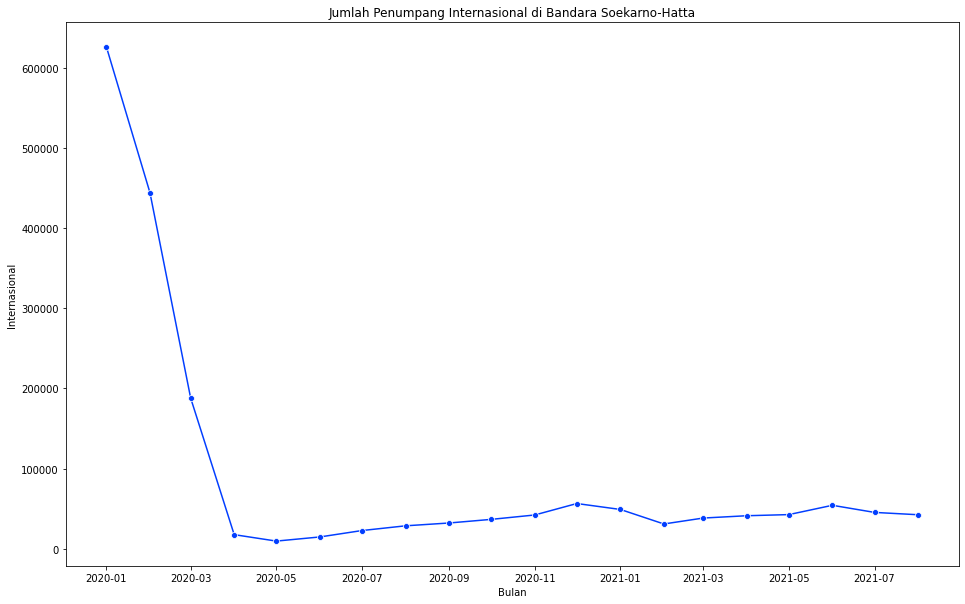

In [ ]:
plt.figure(figsize=(16, 10))
sns.lineplot(data = df_combine, x = 'Bulan', y = 'Internasional', marker = 'o')
plt.title('Jumlah Penumpang Internasional di Bandara Soekarno-Hatta')
plt.show()

In [ ]:
covid = pd.read_excel('/content/Daily Update Data Agregat Covid-19 Jakarta.xlsx')

In [ ]:
covid = covid.loc[:, ['Tanggal', 'Positif Harian']]
covid['Tanggal'] = pd.to_datetime(covid['Tanggal'], format= "%y-%m-%d")
covid['Bulan'] = covid['Tanggal'].dt.month
covid['Tahun'] = covid['Tanggal'].dt.year

covid = covid.groupby(['Tahun', 'Bulan'], as_index = False).agg({'Positif Harian' : 'sum'})

covid['Tanggal'] = covid['Bulan'].astype(str)+ '-' +covid['Tahun'].astype(str)
covid['Tanggal'] = pd.to_datetime(covid['Tanggal'])

covid = covid[0:18] # Ambil data sampai agustus 2021
covid

,Tahun,Bulan,Positif Harian,Tanggal
0,2020,3,741,2020-03-01
1,2020,4,3397,2020-04-01
2,2020,5,3134,2020-05-01
3,2020,6,4004,2020-06-01
4,2020,7,9925,2020-07-01
5,2020,8,19108,2020-08-01
6,2020,9,34059,2020-09-01
7,2020,10,31229,2020-10-01
8,2020,11,31264,2020-11-01
9,2020,12,46874,2020-12-01


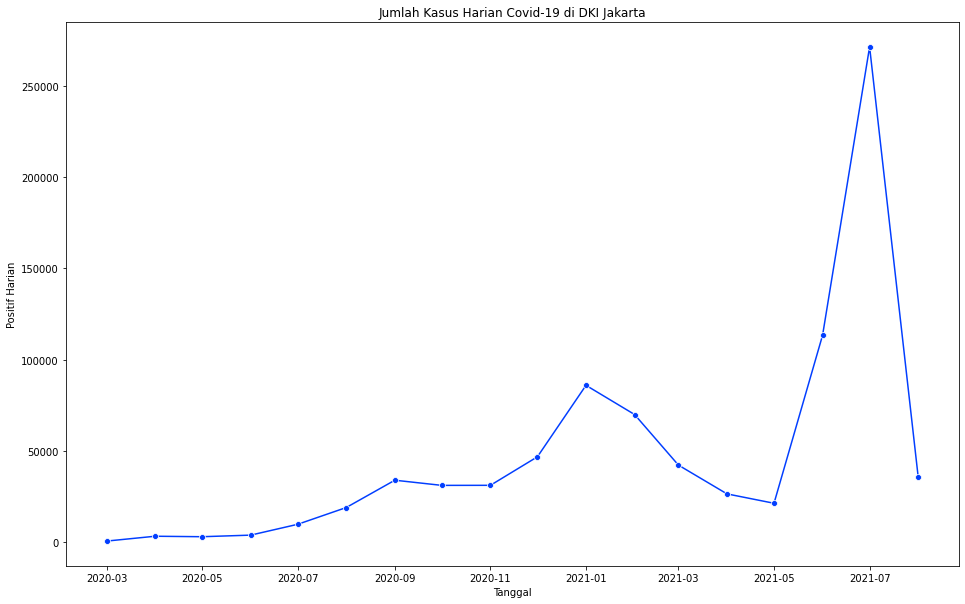

In [ ]:
plt.figure(figsize=(16, 10))
sns.lineplot(data = covid, x = 'Tanggal', y = 'Positif Harian', marker = 'o')
plt.title('Jumlah Kasus Harian Covid-19 di DKI Jakarta')
plt.show()

In [ ]:
covid.to_csv('covid19Jakarta.csv', )
df_combine.to_csv('jumlah_penerbangan.csv', )

In [ ]:
from google.colab import files
files.download('jumlah_penerbangan.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>